# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e fintechs. Olhando no Mundo varias pessoas já foram vitimas deste tipo de fraude Financeira.

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em Data Science

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O dataset representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as features são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por  [𝑉1,𝑉2,𝑉3…,𝑉28].

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter

import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

import numpy as np

In [69]:
simplefilter(action="ignore",category=FutureWarning)

In [70]:
dados=pd.read_csv("creditcard.csv")

Com os dados importados para dentro de uma estrutura Dataframe - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de Machine Learning.

## Análise Exploratoria

Apenas olhando as cinco primeiras entradas é possível tirar algumas conclusões:

As 5 primeiras entradas permitem entender como a transformação PCA deixou as features descaracterizadas (anônimas) e em valores numéricos. Para saber mais sobre PCA, clique neste link.

As colunas Time e Amount foram preservadas, mantendo seu valor original.

A variável alvo está representada na coluna Class, onde:

0= Transação normal

1= Transação fraudulenta

**Ver as 5 primeiras entradas**

In [71]:
labels=["Transação Normal","Transação Fraudulenta"]

In [72]:
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Ver as 5 últimas entradas**

In [73]:
dados.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


**Ver o resumo estatístico do DataFrame**

In [74]:
dados.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Verificar dados ausentes**

Análisando podemos ver que não temos valores ausentes nos nossos dados

In [75]:
df=pd.DataFrame((dados.isnull().sum())/dados.shape[0],columns=["Valores Ausentes"])
df.columns.name="Variaveis"

In [76]:
df

Variaveis,Valores Ausentes
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



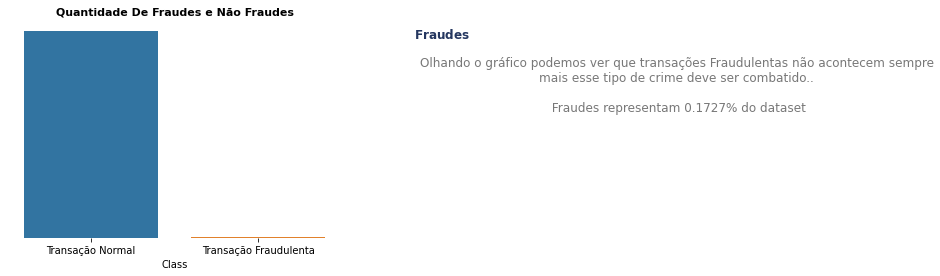

In [77]:
print(dados["Class"].value_counts())

print("\nFraudes representam {:.4f}% do dataset.\n".format((dados[dados.Class == 1].shape[0] / dados.shape[0]) * 100))

fig,ax=plt.subplots()

sns.countplot("Class",data=dados,ax=ax,)

plt.text(x=1.3,
        y=0.9,
        s="$\\bf{Fraudes}$\n",
        
        horizontalalignment='center',
        verticalalignment='center', 
         transform=ax.transAxes,
        color="#253760",
        fontsize=12);

plt.text(x=2,
        y=0.7,
        s="Olhando o gráfico podemos ver "
          "que transações Fraudulentas não acontecem sempre\n"
        "mais esse tipo de crime deve ser combatido..\n\n "
        "Fraudes representam 0.1727% do dataset"
           ,
        
        horizontalalignment='center',
        verticalalignment='center', 
        transform=ax.transAxes,
        color="#787878",
        fontsize=12);

plt.title("Quantidade De Fraudes e Não Fraudes",fontdict={"fontsize":11,"fontweight":"bold"})
plt.gca().axes.get_yaxis().set_visible(False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#ax.set_xticks(x)
ax.set_xticklabels(labels)
#plt.tight_layout()
plt.show()

#Olhando o gráfico podemos ver\n que transações Fraudulentas não acontecem\n sempre,mais esse tipo de crime deve \nser combatido..

**Plotando Histogramas**

Plotou-se também dois gráficos a fim de comparar as distribuições das 2 classes ao longo da dimensão tempo (Time). No entanto, não foi identificada nenhum informação a partir das distribuições de frequência abaixo.

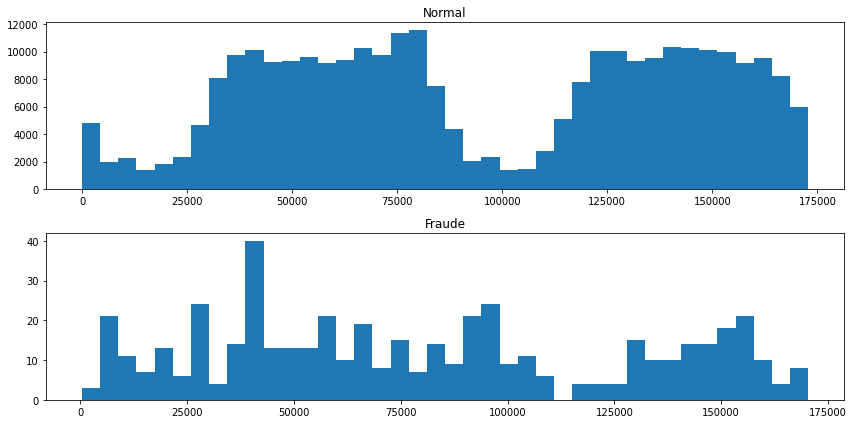

In [78]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1,figsize=(12,6))
num_bins=40
ax1.hist(dados.Time[dados.Class==0],bins=num_bins)
ax1.set_title("Normal")
#ax1.ylabel("Transações")

ax2.hist(dados.Time[dados.Class==1],bins=num_bins)
ax2.set_title("Fraude")
#ax2.ylabel("Transações")

plt.tight_layout()

Seguindo a análise exploratória, plotou-se os boxplots para ver se há alguma diferença no padrão transações em relação à dimensão Amount.

De uma maneira geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de machine learning.

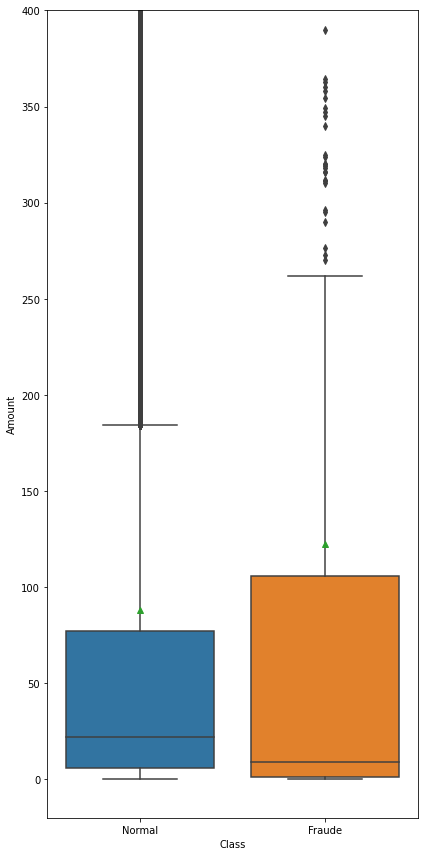

In [79]:
fig,ax=plt.subplots(figsize=(6,12))

sns.boxplot(dados.Class,dados.Amount,showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

As informações estatísticas para df.Class == 1 mostram que a sua média exata está em 118.13 e a mediana em 9.21.

In [80]:
dados[(dados.Class == 1) & (dados.Amount < 2000)]['Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente.

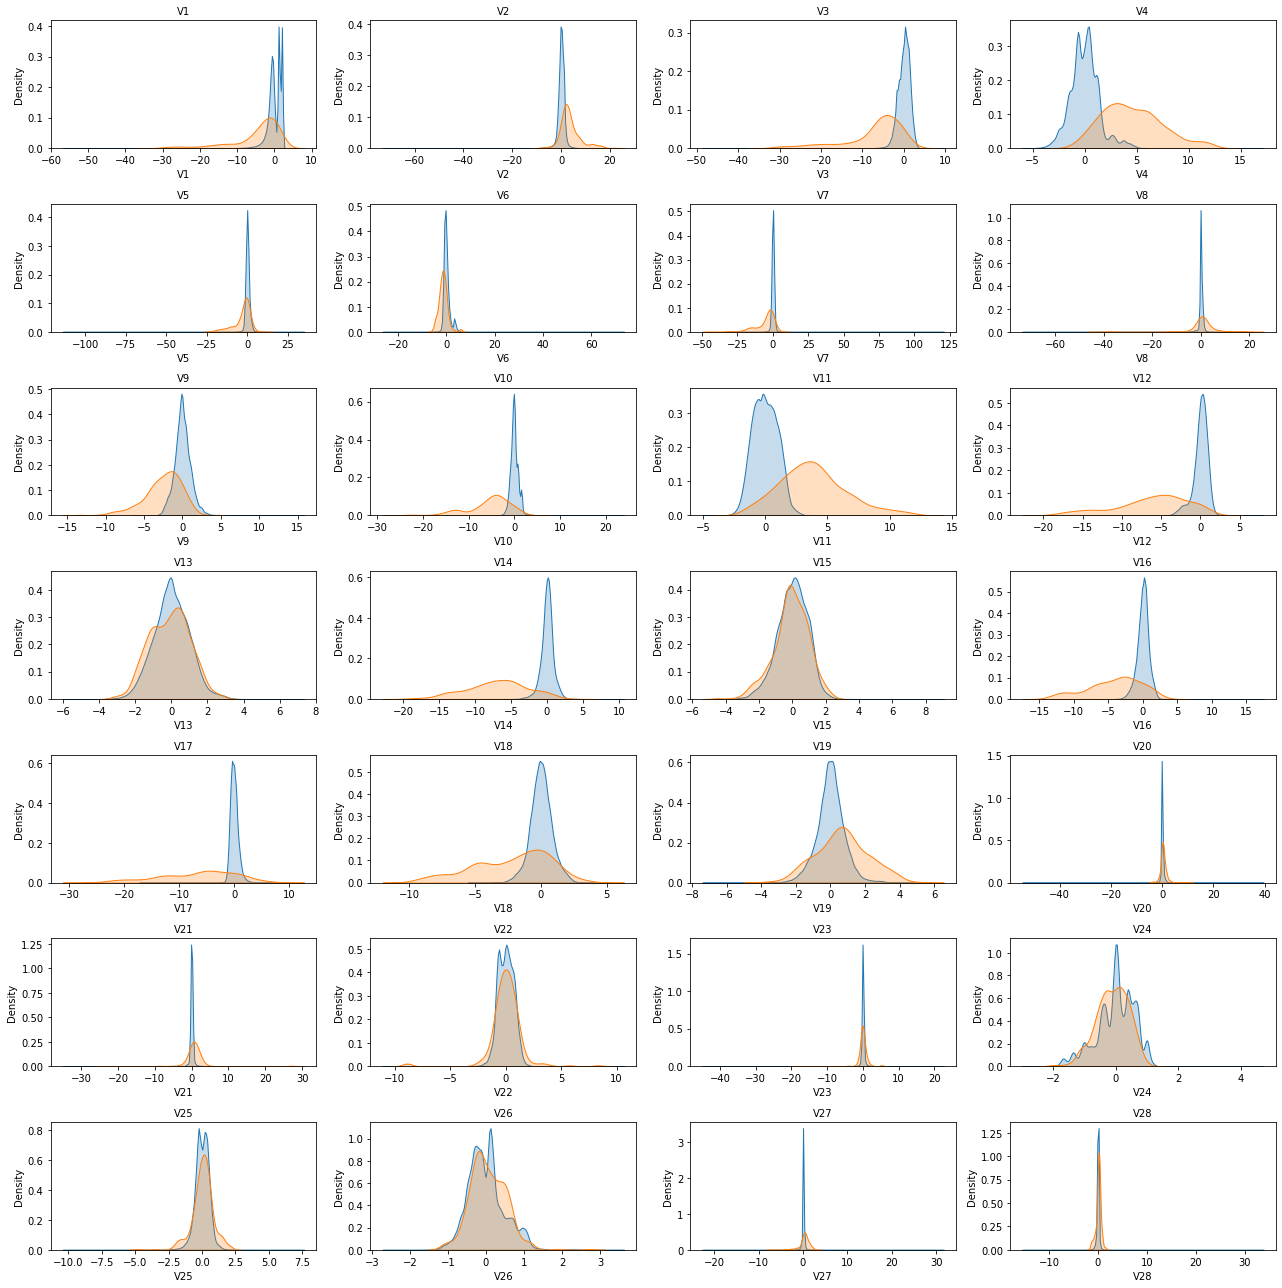

In [81]:
column_names = dados.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = dados[dados.Class == 0]
df_class_1 = dados[dados.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

Resumidamente, algumas observações principais que puderam ser extraídas dessa etapa exploratória foram:

- O dataset está muito desbalanceado, uma vez que as transações fraudulentas representam apenas 0,17% das entradas totais.

- Não existem valores ausentes ou nulos no dataframe.

- Uma vez que a PCA é sensível à escala das variáveis, assume-se a premissa que as features originais foram padronizadas.

- As colunas Time e Amount não estão normalizadas.

## Preparando os dados

Para que os dados possam alimentar o modelo de Regressão Logística que iremos construir, nesta etapa de preparação iremos:

- Padronizar as features Time e Amount, que estão em outra ordem de grandeza.
- Dividir entre dados de treino e teste
- Balancear os dados a fim de evitar uma baixa performance para a classe 1 e overfitting.

## Padronizar Time e Amount

Para esta etapa, uma vez que a coluna Amount possui outliers será usada a padronização por meio da classe StandardScaler.

In [82]:
# padronizar as colunas Time e Amount
df_clean = dados.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**Dividir entre conjuntos de treino e teste**

Antes de proceder com o balanceamento de dados, devemos splitar os dados já existentes entre treino e teste. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado.

Para garantir que os conjuntos de treino e teste tenham a mesma quantidade de classes proporcionalmente, passamos stratify=True.

In [83]:
X=df_clean.drop("Class",axis=1)
Y=df_clean["Class"]

In [84]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,shuffle=True)

**Balanceamento dos dados**

Usando a biblioteca imblearn é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar Under-sampling, preservando a classe minoritária.

É fácil ver que não há mais aquela discrepância inicial (gráfico de barras no início deste notebook).

In [85]:
rus=RandomUnderSampler()


0    369
1    369
Name: Class, dtype: int64


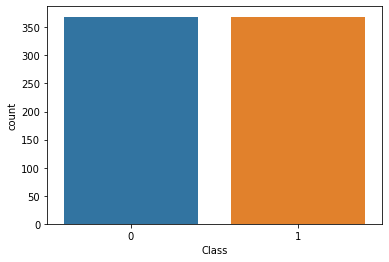

In [86]:

x_rus,y_rus=rus.fit_resample(x_train,y_train)
print(pd.Series(y_rus).value_counts())
sns.countplot(y_rus);


Com os dados balanceados, podemos ver a matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas com as outras.

Observe como anteriormente, sem o balanceamento de dados, a matriz de correlação não trazia nenhuma informação relevante. Entretanto, ela traz muito mais informações após um correto balanceamento.

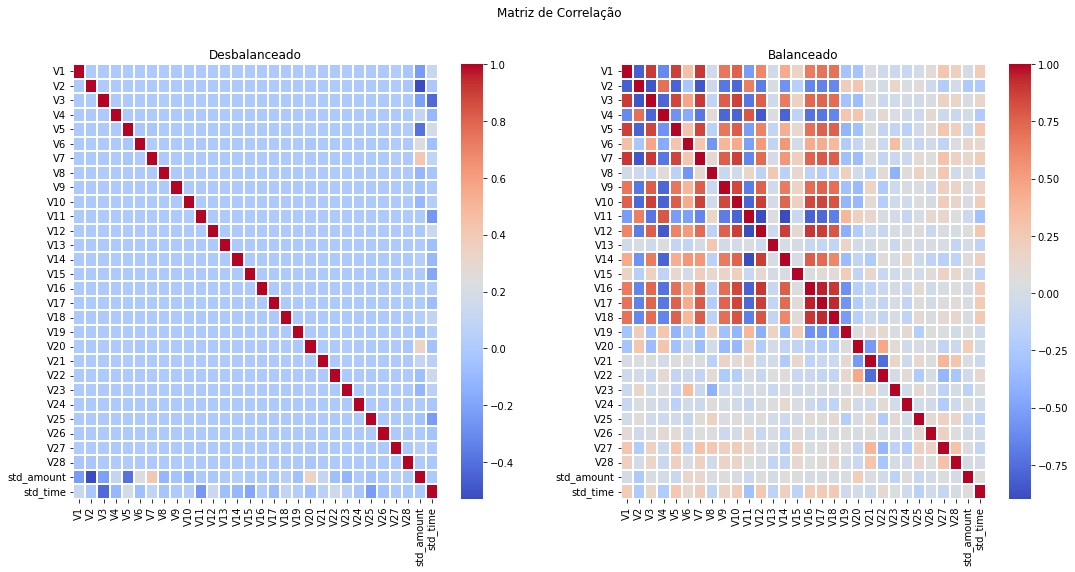

In [87]:
# plotar a matriz de correlação
corr = x_train.corr()
corr_rus = pd.DataFrame(x_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

## Modelo de Machine Learning
Com todos os dados preparados e após uma análise exploratória completa, irei construir um classificador usando a Regressão Logística.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em X_rus e y_rus. Na sequência, serão realizadas as previsões sobre os dados de teste.

In [88]:
np.random.seed(2)

modelo_LR=LogisticRegression()

In [89]:
modelo_LR.fit(x_rus,y_rus)

LogisticRegression()

In [90]:
y_pred=modelo_LR.predict(x_test)

In [91]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [92]:
y_pred_proba=modelo_LR.predict_proba(x_test)

In [93]:
y_pred_proba

array([[0.86280458, 0.13719542],
       [0.0914651 , 0.9085349 ],
       [0.78237834, 0.21762166],
       ...,
       [0.99019646, 0.00980354],
       [0.99372212, 0.00627788],
       [0.89648631, 0.10351369]])

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9571    0.9781     71079
           1     0.0367    0.9431    0.0706       123

    accuracy                         0.9571     71202
   macro avg     0.5183    0.9501    0.5243     71202
weighted avg     0.9982    0.9571    0.9765     71202

Acurácia: 0.9571

AUC: 0.9501



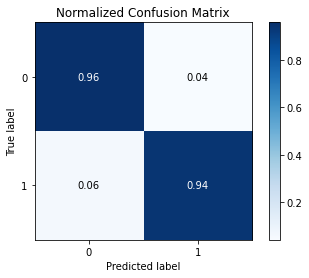

In [95]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

## Conclusões
Como você pode observar, não se trata de um problema trivial. Apesar dos dados estarem bem tratados e limpos, sem valores ausentes ou variáveis categóricas, o desbalanceamento e a Transformação PCA demandaram um trabalho considerável.

Obviamente, apesar do bom resultado final, há espaço para testar o desempenho com outros algoritmos de classificação, além de otimizar seus parâmetros.